In [1062]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

- Find the null values in different columns. Do not drop the null values, fill it up with the appropriate values.
- Check the data types of each column and change them accordingly. You can drop the noise values.
- Find the 5-point summary of the numerical columns
- Find the different unique values in each categorical column.
- Create a correlation heatmap to check the correlation of different variables with each other.
- Plot histogram of ChestPainType, RestingECG, and heart disease
- Plot distribution of Age, Cholesterol, and MaxHR.
- Plot Pair plots of numerical variables.
- Apply the scaling on numerical columns and encode the categorical ones.
- Train the logistic regression model with the help of all given columns.
- Check F score
- Calculate precision and recall

In [1063]:
train_df = pd.read_csv('datasets\\train_data_978637.csv')
train_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1
4,NaN,M,NAP,120.0,339.0,0.0,Normal,170.0,N,0.0,Up,0


In [1064]:
test_df=pd.read_csv('datasets\\test_df_with_label_692652.csv')
test_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,51.0,F,ASY,160.0,303.0,0.0,Normal,150.0,Y,1.0,Flat,1
1,60.0,F,NAP,120.0,178.0,1.0,Normal,96.0,N,0.0,Up,0
2,52.0,F,NAP,125.0,272.0,0.0,Normal,139.0,N,0.0,Up,0
3,61.0,M,ASY,110.0,0.0,1.0,Normal,108.0,Y,2.0,Down,1
4,60.0,M,ASY,130.0,206.0,0.0,LVH,132.0,Y,2.4,Flat,1


In [1065]:
noise=[]
for i in train_df.Age.values:
    try:
        float(i)
    except:
        noise.append(i)
print(*noise)

In [1066]:
train_df[(train_df.RestingBP<=130)&(train_df.RestingBP>=120)]['Age'].mode()

0    56.0
Name: Age, dtype: float64

In [1067]:
train_df.Age.replace(np.NaN,56.0,inplace=True)

In [1068]:
train_df[train_df.Age.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [1069]:
train_df.Age = train_df.Age.astype(int)

In [1070]:
train_df[train_df.Sex.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
110,54,NaN,ATA,120.0,230.0,1.0,Normal,140.0,N,0.0,Up,0
324,38,NaN,ASY,150.0,0.0,1.0,Normal,120.0,Y,0.7,Flat,1


In [1071]:
train_df[train_df.RestingBP==120]['Sex'].mode()

0    M
Name: Sex, dtype: object

In [1072]:
train_df.loc[110,'Sex']="M"

In [1073]:
train_df[(train_df.RestingBP==150)&(train_df.Cholesterol==0.0)]['Sex'].mode()

0    M
Name: Sex, dtype: object

In [1074]:
train_df.loc[324,'Sex']="M"

In [1075]:
train_df[train_df.ChestPainType.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
115,43,F,NaN,120.0,215.0,0.0,ST,175.0,N,0.0,Up,0
330,51,M,NaN,130.0,0.0,1.0,ST,163.0,N,NaN,Flat,1
536,44,M,NaN,110.0,197.0,0.0,LVH,177.0,N,0.0,Up,1
675,57,M,NaN,150.0,168.0,0.0,Normal,174.0,N,1.6,Up,0


In [1076]:
train_df[(train_df.RestingBP==110)&(train_df.RestingECG=='LVH')]['ChestPainType'].mode()


0    ASY
Name: ChestPainType, dtype: object

In [1077]:
train_df[(train_df.RestingBP==150.0)&(train_df.RestingECG=='Normal')]['ChestPainType'].mode()


0    ASY
Name: ChestPainType, dtype: object

In [1078]:
train_df[(train_df.RestingBP>120)&(train_df.RestingBP<130)&(train_df.RestingECG=='ST')]['ChestPainType'].mode()


0    ASY
Name: ChestPainType, dtype: object

In [1079]:
train_df.loc[115,'ChestPainType']='ASY'
train_df.loc[330,'ChestPainType']='ASY'
train_df.loc[536,'ChestPainType']='ASY'
train_df.loc[675,'ChestPainType']='ASY'

In [1080]:
train_df[train_df.RestingBP.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
11,39,M,ATA,NaN,204.0,0.0,Normal,145.0,N,0.0,Up,0


In [1081]:
train_df[train_df.HeartDisease==0]['RestingBP'].mode()

0    120.0
Name: RestingBP, dtype: float64

In [1082]:
train_df.loc[11,'RestingBP']=120

In [1083]:
train_df[train_df.Cholesterol.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
122,53,M,ASY,140.0,NaN,0.0,Normal,155.0,N,0.0,Up,0
338,54,M,ASY,180.0,NaN,1.0,Normal,150.0,N,1.5,Flat,1
543,41,F,ATA,105.0,NaN,0.0,Normal,168.0,N,0.0,Up,0


In [1084]:
train_df[(train_df.Age>40)&(train_df.RestingECG=='Normal')]['Cholesterol'].mode()

0    0.0
Name: Cholesterol, dtype: float64

In [1085]:
train_df.Cholesterol.fillna(0,inplace=True)

In [1086]:
train_df[train_df.FastingBS.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
19,44,M,ATA,120.0,184.0,NaN,Normal,142.0,N,1.0,Flat,0


In [1087]:
train_df.FastingBS.mode()

0    0.0
Name: FastingBS, dtype: float64

In [1088]:

train_df.FastingBS.fillna(0,inplace=True)

In [1089]:
train_df[train_df.RestingECG.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
343,60,M,ASY,132.0,218.0,0.0,NaN,140.0,Y,1.5,Down,1
687,62,F,ASY,160.0,164.0,0.0,NaN,145.0,N,6.2,Down,1


In [1090]:
train_df.RestingECG.mode()

0    Normal
Name: RestingECG, dtype: object

In [1091]:
train_df.RestingECG.fillna('Normal',inplace=True)

In [1092]:
train_df[train_df.MaxHR.isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,M,NAP,145.0,518.0,0.0,Normal,NaN,N,0.0,Flat,1
112,46,M,ASY,110.0,202.0,0.0,Normal,NaN,Y,0.0,Flat,1
550,57,M,ASY,150.0,276.0,0.0,LVH,NaN,Y,0.6,Flat,1


In [1093]:
train_df.MaxHR.mode()

0    140.0
Name: MaxHR, dtype: float64

In [1094]:
train_df.MaxHR.fillna(140,inplace=True)

In [1095]:
train_df.ExerciseAngina.mode()

0    N
Name: ExerciseAngina, dtype: object

In [1096]:
train_df.ExerciseAngina.fillna('N',inplace=True)

In [1097]:
train_df.Oldpeak.mode()

0    0.0
Name: Oldpeak, dtype: float64

In [1098]:
train_df.ST_Slope.mode()

0    Flat
Name: ST_Slope, dtype: object

In [1099]:
train_df.Oldpeak.fillna(0,inplace=True)
train_df.ST_Slope.fillna(0,inplace=True)


In [1100]:
desc=pd.DataFrame(index=list(train_df))
desc['count']=train_df.shape[0]
desc['unique']=train_df.nunique()
desc['null']=train_df.isnull().sum()
desc['dtype']=train_df.dtypes
desc = pd.concat([desc,train_df.describe().T],axis=1)
desc

,count,unique,null,dtype,count,mean,std,min,25%,50%,75%,max
Age,741,49,0,int32,741.0,53.477733,9.498711,28.0,47.0,54.0,60.0,77.0
Sex,741,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,741,4,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,741,66,0,float64,741.0,132.040486,18.525832,0.0,120.0,130.0,140.0,200.0
Cholesterol,741,209,0,float64,741.0,201.241565,110.908154,0.0,174.0,223.0,269.0,603.0
FastingBS,741,2,0,float64,741.0,0.240216,0.427503,0.0,0.0,0.0,0.0,1.0
RestingECG,741,3,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,741,115,0,float64,741.0,137.823212,25.135682,63.0,120.0,139.0,156.0,202.0
ExerciseAngina,741,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,741,52,0,float64,741.0,0.900000,1.097356,-2.6,0.0,0.6,1.5,6.2


In [1101]:
desct=pd.DataFrame(index=list(test_df))
desct['count']=test_df.shape[0]
desct['unique']=test_df.nunique()
desct['null']=test_df.isnull().sum()
desct['dtype']=test_df.dtypes
desct = pd.concat([desct,test_df.describe().T],axis=1)
desct

,count,unique,null,dtype,count,mean,std,min,25%,50%,75%,max
Age,177,39,0,float64,177.0,53.920904,8.976261,30.0,48.0,54.0,60.0,76.0
Sex,177,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,177,4,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,177,40,0,float64,177.0,133.887006,18.442746,98.0,120.0,130.0,140.0,200.0
Cholesterol,177,102,0,float64,177.0,186.084746,104.266969,0.0,161.0,218.0,257.0,358.0
FastingBS,177,2,0,float64,177.0,0.203390,0.403662,0.0,0.0,0.0,0.0,1.0
RestingECG,177,3,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,177,78,0,float64,177.0,132.723164,26.368179,60.0,112.0,130.0,152.0,190.0
ExerciseAngina,177,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,177,26,0,float64,177.0,0.834463,0.927606,0.0,0.0,0.5,1.5,3.5


C:\Users\farzi\AppData\Local\Temp\ipykernel_8988\3612088907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat = train_df.corr()


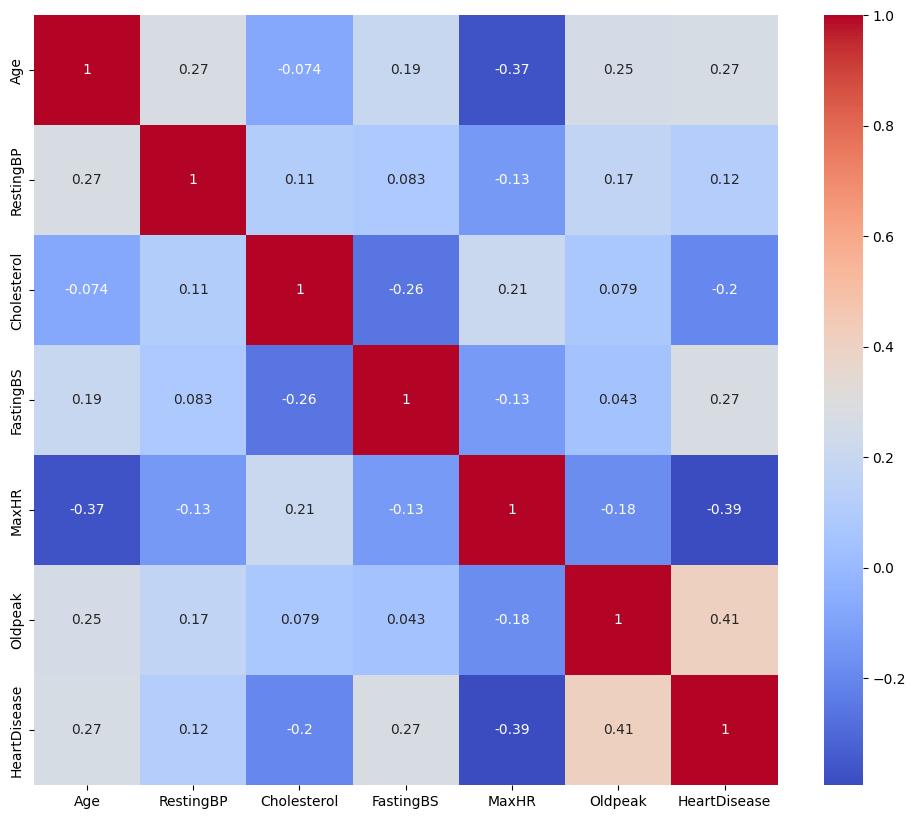

In [1102]:
cor_mat = train_df.corr()
figure=plt.figure(figsize=(12,10))
sns.heatmap(cor_mat,annot=True,cmap='coolwarm')
plt.show()

<Axes: xlabel='ChestPainType', ylabel='Count'>

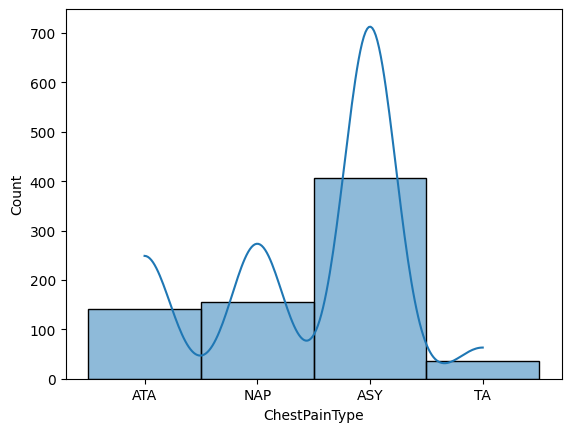

In [1103]:
sns.histplot(train_df['ChestPainType'],kde=True)

<Axes: xlabel='RestingECG', ylabel='Count'>

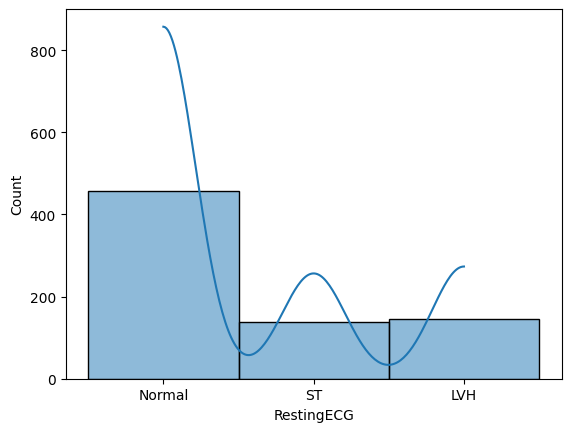

In [1104]:
sns.histplot(train_df['RestingECG'],kde=True)

<Axes: xlabel='HeartDisease', ylabel='Count'>

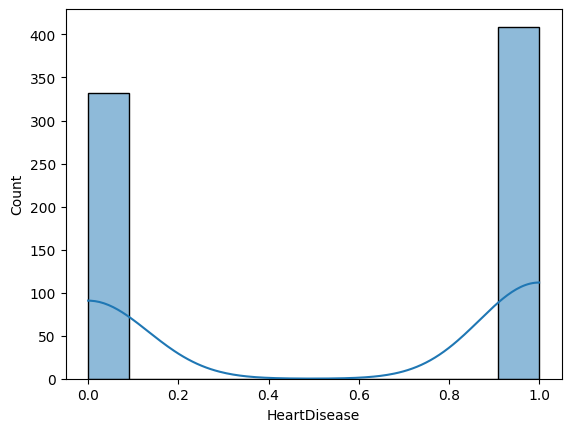

In [1105]:
sns.histplot(train_df['HeartDisease'],kde=True)

<Axes: ylabel='Frequency'>

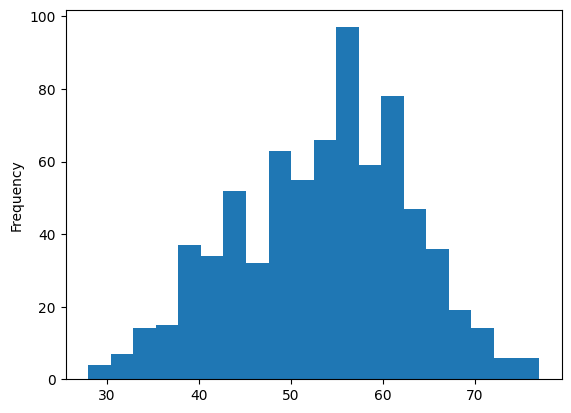

In [1106]:
train_df.Age.plot(kind='hist',bins=20)

<Axes: ylabel='Frequency'>

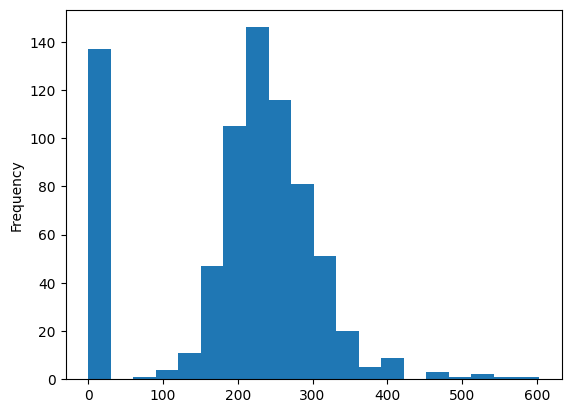

In [1107]:
train_df.Cholesterol.plot(kind='hist',bins=20)

<Axes: ylabel='Frequency'>

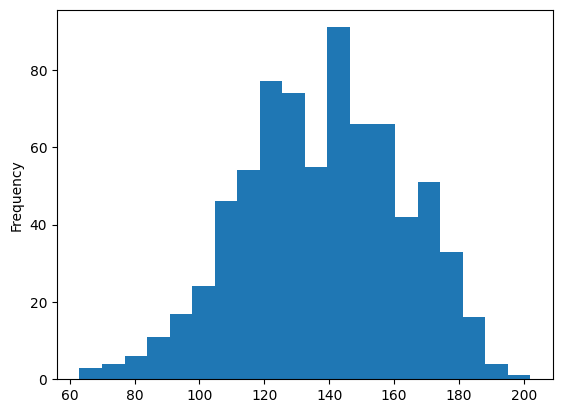

In [1108]:
train_df.MaxHR.plot(kind='hist',bins=20)

c:\Users\farzi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


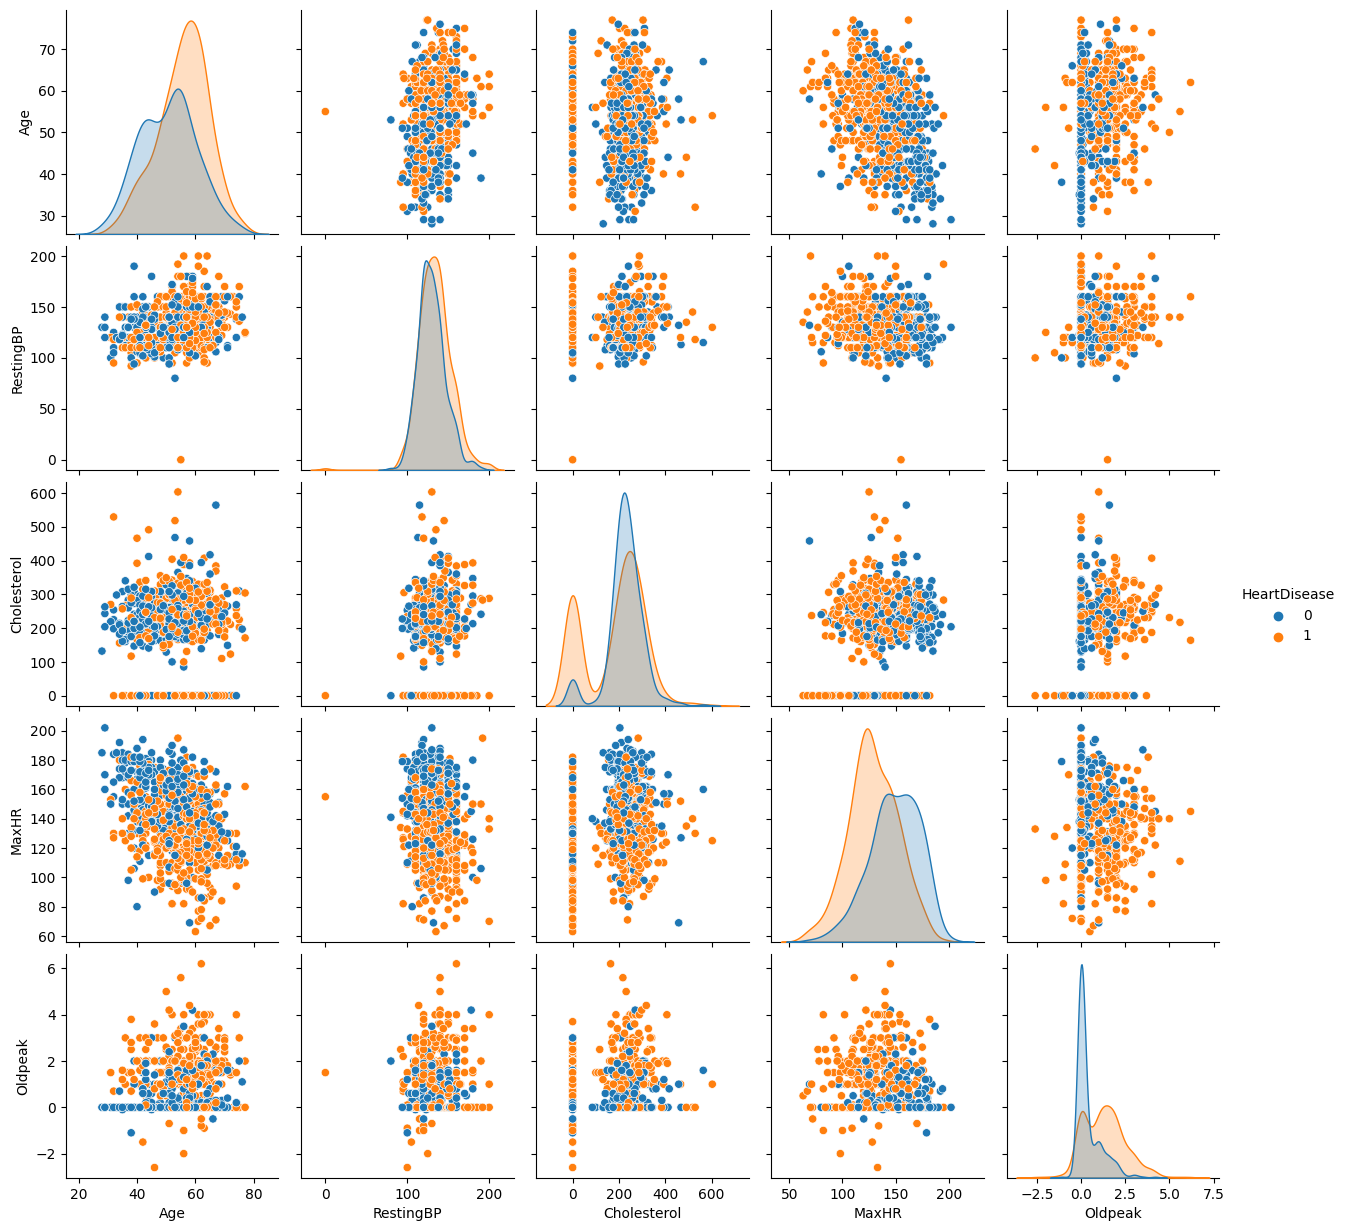

In [1109]:
#Plot Pair plots of numerical variables.
sns.pairplot(train_df[['Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']],hue='HeartDisease')

In [1110]:
num_col=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [1111]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[num_col] = scaler.fit_transform(train_df[num_col])
test_df[num_col] = scaler.transform(test_df[num_col])

In [1112]:
lab_enc=['ST_Slope']
one_hot = ['ExerciseAngina','RestingECG','ChestPainType','Sex']

In [1113]:
# Assuming 'df' is your DataFrame containing the data
train_df = pd.get_dummies(train_df, columns=['FastingBS'], prefix=['FastingBS'],drop_first=True)
train_df = pd.get_dummies(train_df, columns=['ExerciseAngina'], prefix=['ExerciseAngina'],drop_first=True)
train_df = pd.get_dummies(train_df, columns=['RestingECG'], prefix=['RestingECG'],drop_first=True)
train_df = pd.get_dummies(train_df, columns=['ChestPainType'], prefix=['ChestPainType'],drop_first=True)
train_df = pd.get_dummies(train_df, columns=['Sex'], prefix=['Sex'],drop_first=True)

# Assuming 'df' is your DataFrame containing the data
test_df = pd.get_dummies(test_df, columns=['FastingBS'], prefix=['FastingBS'],drop_first=True)
test_df = pd.get_dummies(test_df, columns=['ExerciseAngina'], prefix=['ExerciseAngina'],drop_first=True)
test_df = pd.get_dummies(test_df, columns=['RestingECG'], prefix=['RestingECG'],drop_first=True)
test_df = pd.get_dummies(test_df, columns=['ChestPainType'], prefix=['ChestPainType'],drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex'], prefix=['Sex'],drop_first=True)


In [1114]:
train_df.ST_Slope.unique()

array(['Up', 'Flat', 0, 'Down'], dtype=object)

In [1115]:
train_df.ST_Slope=train_df.ST_Slope.replace(0,"Flat")

In [1116]:
train_df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [1117]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
encoder = LabelEncoder()
train_df['ST_Slope'] = encoder.fit_transform(train_df['ST_Slope'])
test_df['ST_Slope'] = encoder.fit_transform(test_df['ST_Slope'])


In [1118]:
train_df


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,FastingBS_1.0,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M
0,-1.419860,0.429934,0.791806,1.360611,-0.820707,2,0,0,0,1,0,1,0,0,1
1,-0.471723,1.510237,-0.191653,0.723635,0.091190,1,1,0,0,1,0,0,1,0,0
2,-1.735905,-0.110217,0.737670,-1.585400,-0.820707,2,0,0,0,0,1,1,0,0,1
3,-0.577071,0.321904,0.115114,-1.187290,0.547138,1,1,0,1,1,0,0,0,0,0
4,0.265717,-0.650369,1.242934,1.280989,-0.820707,2,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.371066,0.429934,0.358723,-0.590126,-0.638328,1,1,0,1,1,0,0,0,0,0
737,1.529900,0.645995,-0.074360,0.126471,2.279743,1,1,1,0,1,0,0,0,0,1
738,0.371066,-0.110217,-0.633759,-0.908614,0.273569,1,1,0,1,1,0,0,0,0,1
739,0.371066,-0.110217,0.313610,1.440232,-0.820707,1,1,0,0,0,0,1,0,0,0


In [1119]:
test_df


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ST_Slope,HeartDisease,FastingBS_1.0,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M
0,-0.261026,1.510237,0.918122,0.484770,0.091190,1,1,0,1,1,0,0,0,0,0
1,0.687111,-0.650369,-0.209698,-1.665022,-0.820707,2,0,1,0,1,0,0,1,0,0
2,-0.155677,-0.380293,0.638422,0.046849,-0.820707,2,0,0,0,1,0,0,1,0,0
3,0.792460,-1.190520,-1.815714,-1.187290,1.003087,0,1,1,1,1,0,0,0,0,1
4,0.687111,-0.110217,0.042933,-0.231828,1.367846,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1.740597,-0.920444,-1.815714,-1.824266,-0.820707,1,1,0,1,0,1,0,0,0,1
173,0.792460,0.862055,0.015866,0.922690,-0.820707,2,1,0,0,1,0,0,0,0,1
174,-2.157299,-1.730671,0.403836,0.484770,0.091190,1,1,0,1,1,0,0,0,0,0
175,-1.103814,-0.542338,-1.815714,-0.709559,-0.364759,2,1,0,0,1,0,0,0,0,1


In [1120]:
train_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'FastingBS_1.0', 'ExerciseAngina_Y',
       'RestingECG_Normal', 'RestingECG_ST', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M'],
      dtype='object')

In [1121]:
x_train = train_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope', 'FastingBS_1.0', 'ExerciseAngina_Y','RestingECG_Normal', 'RestingECG_ST', 'ChestPainType_ATA','ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M']]
y_train = train_df['HeartDisease']
x_test = test_df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ST_Slope', 'FastingBS_1.0', 'ExerciseAngina_Y','RestingECG_Normal', 'RestingECG_ST', 'ChestPainType_ATA','ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M']]
y_test = test_df['HeartDisease']

In [1122]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


LogisticRegression()

In [1123]:
y_pred = logreg.predict(x_test)

In [1124]:
y_pred


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1], dtype=int64)

In [1125]:
# confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[64, 14],
       [11, 88]], dtype=int64)

In [1126]:
TN=cnf_matrix[0][0]
TP=cnf_matrix[1][1]
FN=cnf_matrix[1][0]
FP=cnf_matrix[0][1]

In [1127]:
print(TN,TP,FN,FP)

64 88 11 14


In [1129]:
precision = TP/(TP+FP)
print(precision)

0.8627450980392157


In [1130]:
recall = TP/(TP+FN)
print(recall)

0.8888888888888888


In [1131]:
f1_score = 2*precision*recall/(precision+recall)
print(f1_score)

0.8756218905472637
